# Glassdoor Data Science Job Analysis

Goal: Discover patterns in technologies and skills for data science job postings.

### Framework
1. Data Preprocessing
2. Feature Selection
3. PCA
4. Results

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
project_root = Path.cwd().parent
data_path = project_root / "data" / "cleaned_job_data.csv"

df = pd.read_csv(data_path)

In [4]:
df.head()

,rating,founded,job_description,company_name,location,headquarters,size,type_of_ownership,industry,sector,...,excel,analysis,machine_learning,tableau,power_bi,statistics,data_science,data_engineering,computer_science,mathematics
0,NaN,NaN,Job Description\nBecome a thought leader withi...,JKGT,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,1,0,0,0,0
1,NaN,NaN,Job Description\nWorking at Sophinea\n\nSophin...,Sophinea,"Chantilly, VA",NaN,1 to 50 employees,Unknown,NaN,NaN,...,0,0,0,0,0,0,1,0,1,0
2,NaN,NaN,"Job Description\nAs a Data Scientist, you will...",HireAi,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0,1,1,0,1,1
3,NaN,NaN,"Job Description\nAs a Data Scientist, you will...",HireAi,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0,1,1,0,1,1
4,NaN,NaN,Job Description\nClear Ridge has an exciting o...,Clear Ridge Defense,"Quantico, VA","Baltimore, MD",1 to 50 employees,Company - Private,NaN,NaN,...,0,1,0,0,0,1,1,0,1,0


In [5]:
df.shape

(659, 37)

In [6]:
df.dtypes

rating               float64
founded              float64
job_description       object
company_name          object
location              object
headquarters          object
size                  object
type_of_ownership     object
industry              object
sector                object
revenue               object
competitors           object
job_title             object
salary_estimate       object
min_salary             int64
max_salary             int64
avg_salary             int64
salary_clean          object
job_state             object
hq_state              object
same_state           float64
python                 int64
r                      int64
sql                    int64
azure                  int64
docker                 int64
aws                    int64
excel                  int64
analysis               int64
machine_learning       int64
tableau                int64
power_bi               int64
statistics             int64
data_science           int64
data_engineeri

Target variables: rating + avg_salary

- Question: What tools and skills correspond with higher salaries
- Question: What factors are indicators of higher job rating

In [7]:
df.isna().sum()

rating                39
founded              107
job_description        0
company_name           0
location               0
headquarters          20
size                  16
type_of_ownership     16
industry              60
sector                60
revenue               16
competitors          488
job_title              0
salary_estimate        0
min_salary             0
max_salary             0
avg_salary             0
salary_clean           0
job_state              0
hq_state              20
same_state            20
python                 0
r                      0
sql                    0
azure                  0
docker                 0
aws                    0
excel                  0
analysis               0
machine_learning       0
tableau                0
power_bi               0
statistics             0
data_science           0
data_engineering       0
computer_science       0
mathematics            0
dtype: int64

In [8]:
(df.isna().mean() * 100).round(2)

rating                5.92
founded              16.24
job_description       0.00
company_name          0.00
location              0.00
headquarters          3.03
size                  2.43
type_of_ownership     2.43
industry              9.10
sector                9.10
revenue               2.43
competitors          74.05
job_title             0.00
salary_estimate       0.00
min_salary            0.00
max_salary            0.00
avg_salary            0.00
salary_clean          0.00
job_state             0.00
hq_state              3.03
same_state            3.03
python                0.00
r                     0.00
sql                   0.00
azure                 0.00
docker                0.00
aws                   0.00
excel                 0.00
analysis              0.00
machine_learning      0.00
tableau               0.00
power_bi              0.00
statistics            0.00
data_science          0.00
data_engineering      0.00
computer_science      0.00
mathematics           0.00
d

Let's just drop competitors because it's not useful in answering skill/tool demand questions and a large fraction of it is missing. It's also not numeric, so we can't impute.

Also the skills and tools columns were pulled from job_description, so let's delete that.

In [9]:
df = df.drop(columns=["competitors", "job_description"])

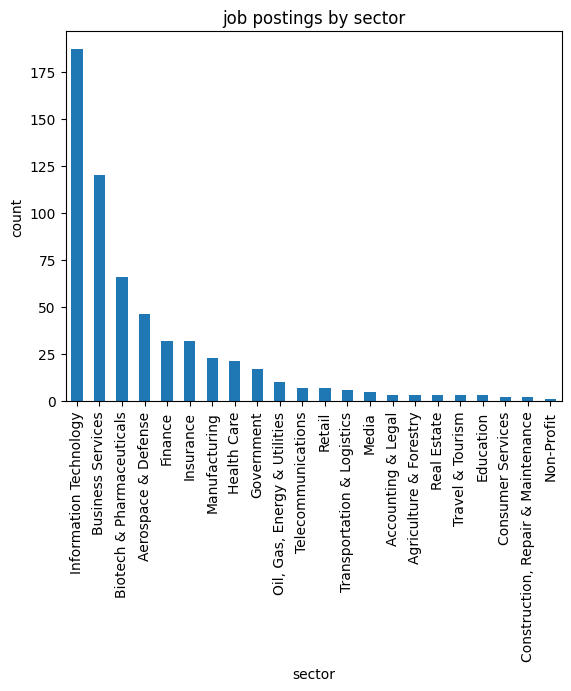

industry
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                56
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      7
Telecommunications Services                  5
Energy                                       5
Consumer Products Manufacturing              5
Insurance Agencies & Brokerages              4
Food & Beverage Manufacturing                4
Misc

In [14]:
sector_counts = df["sector"].value_counts()

plt.figure()
sector_counts.plot(kind="bar")
plt.title("job postings by sector")
plt.xlabel("sector")
plt.ylabel("count")
plt.show()

print(df["industry"].value_counts(), "\n")

print(df["revenue"].value_counts())
print(df["size"].value_counts())

In [15]:
df["type_of_ownership"].value_counts()

type_of_ownership
Company - Private                 395
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
Government                         10
Other Organization                  5
Unknown                             4
Private Practice / Firm             4
College / University                3
Contract                            2
Self-employed                       2
Hospital                            1
Name: count, dtype: int64

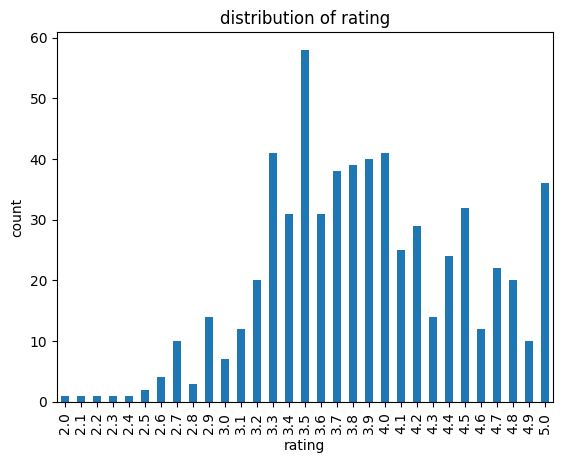

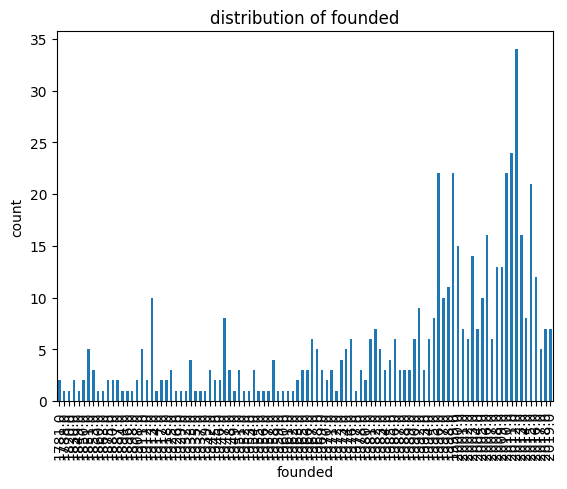

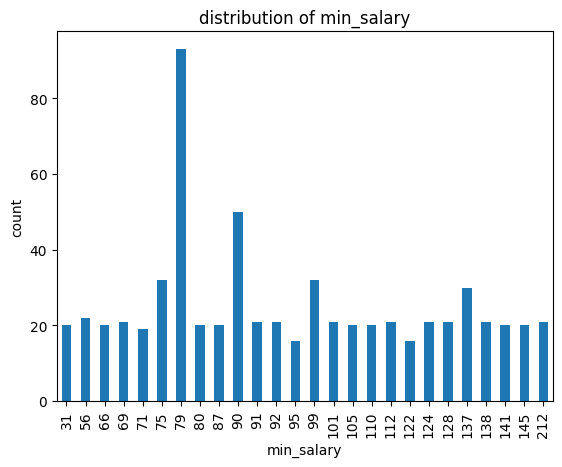

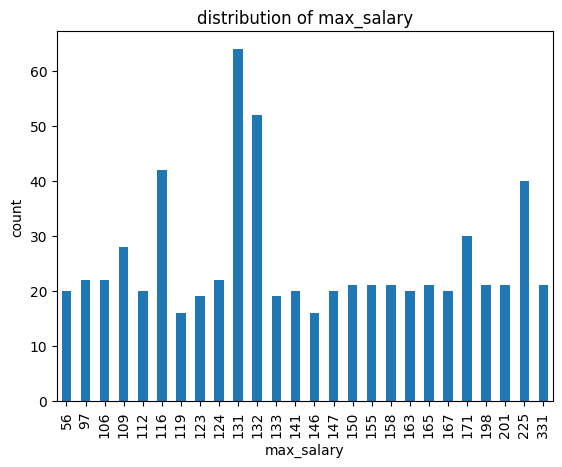

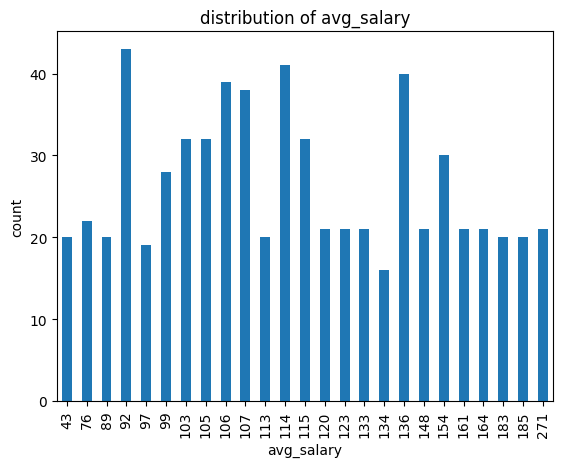

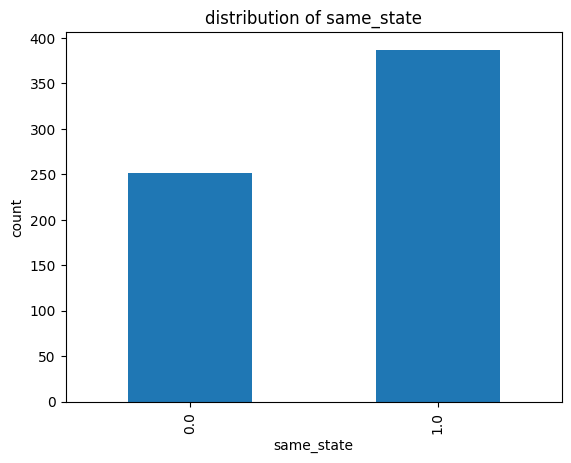

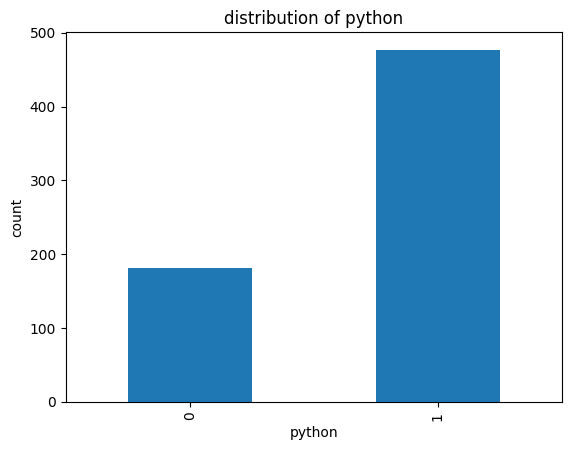

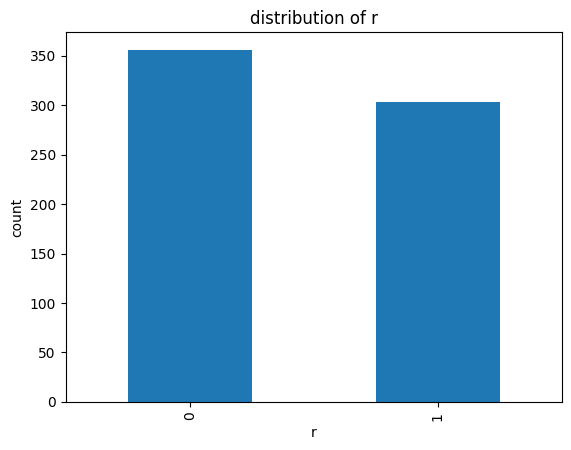

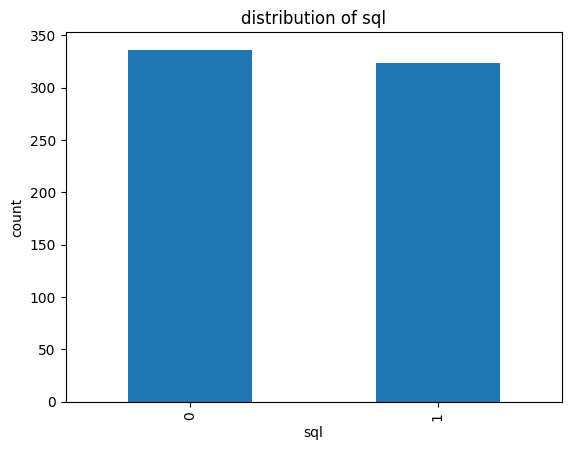

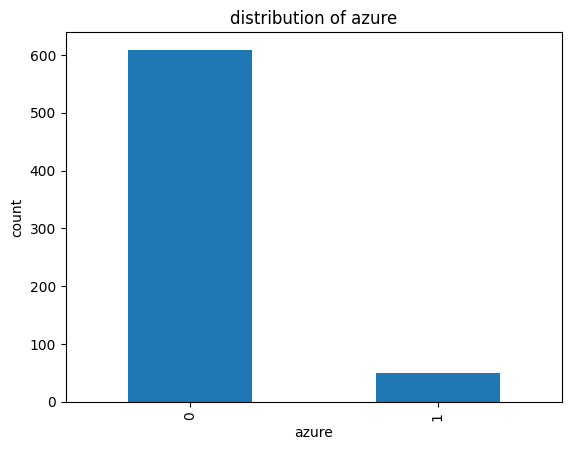

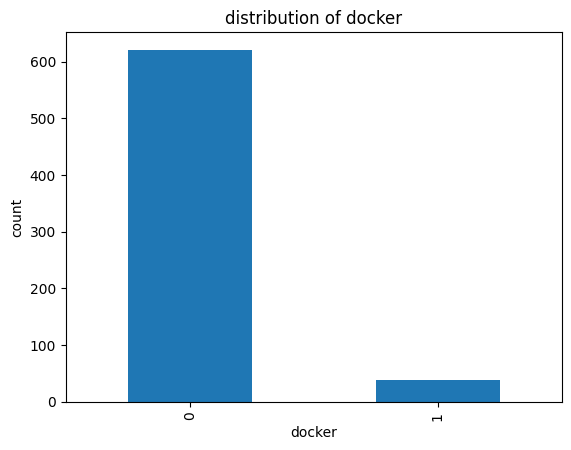

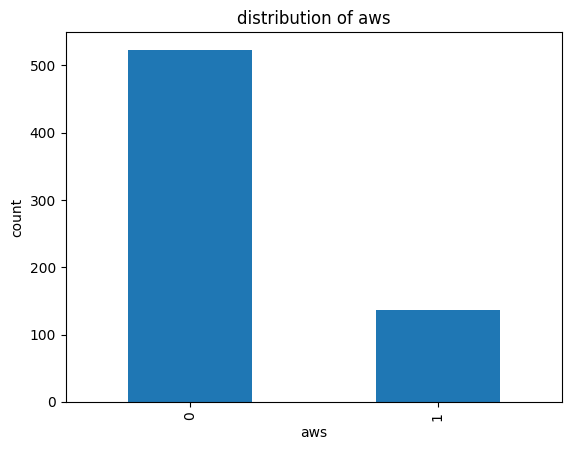

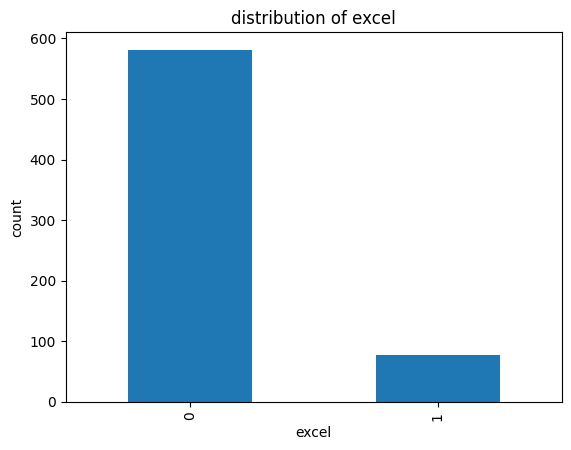

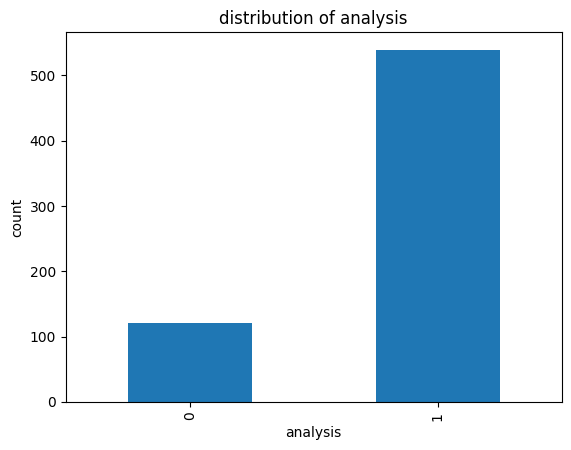

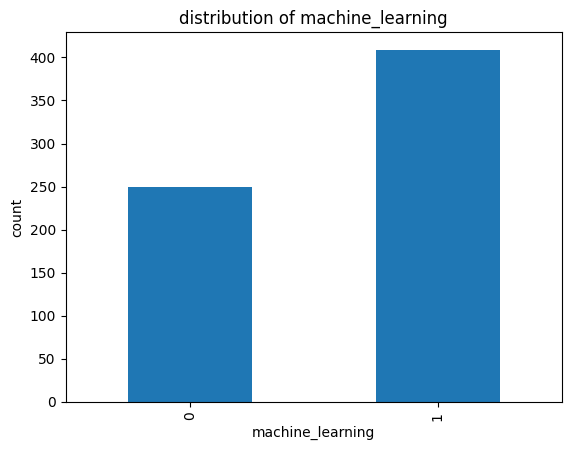

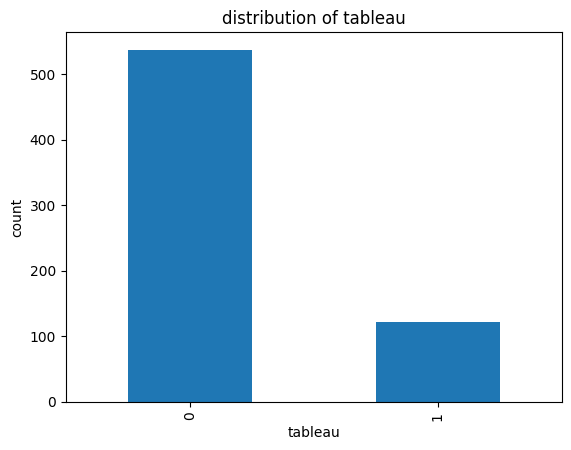

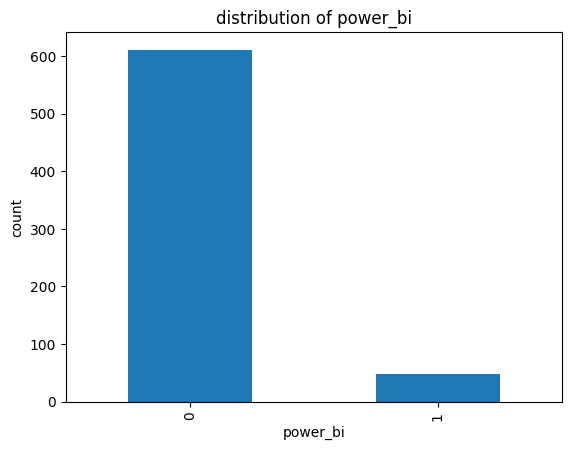

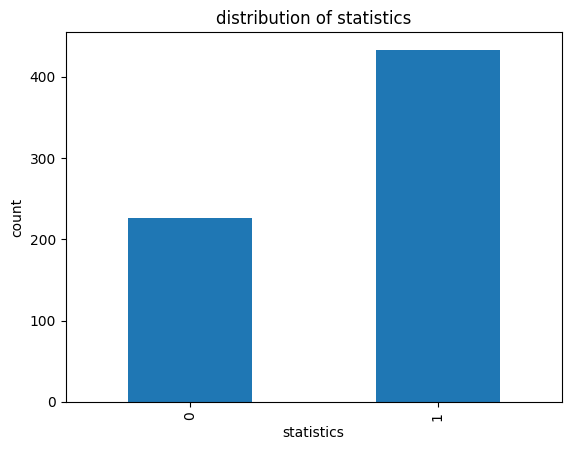

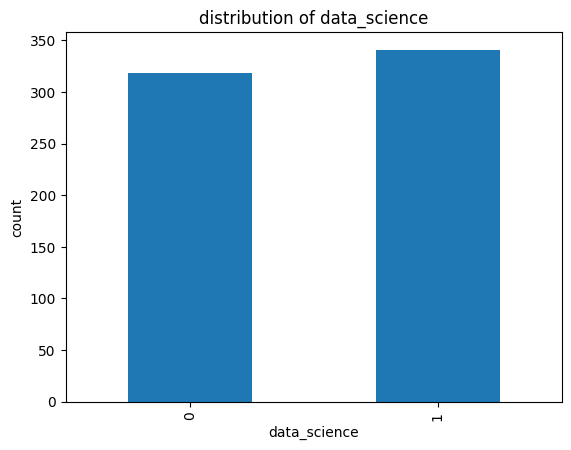

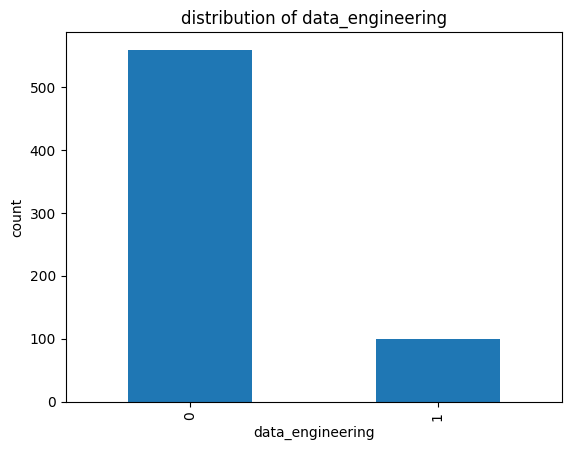

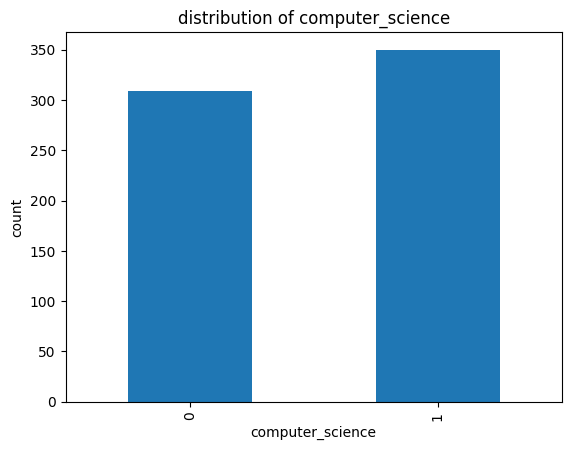

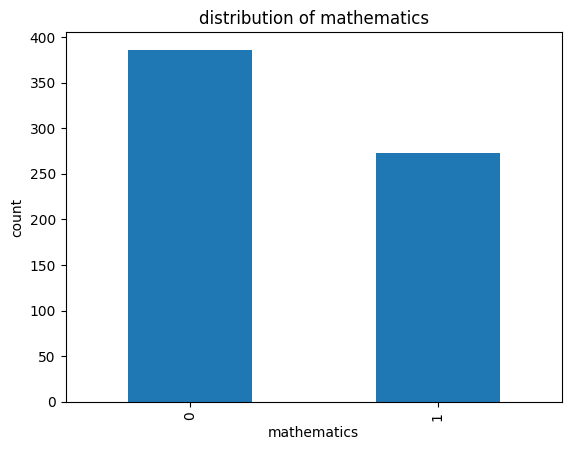

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# select numeric columns only
numeric_df = df.select_dtypes(include="number")

# loop through columns and plot
for col in numeric_df.columns:
    counts = numeric_df[col].value_counts().sort_index()

    plt.figure()
    counts.plot(kind="bar")
    plt.title(f"distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

# rating is centered around 3.5
# i don't think founded is useful to predict rating, so let's just omit
# min salary peaks at 79K
# max salary peaks at 131K
# avg salary is multimodal


In [ ]:
numeric_df.columns

Index(['rating', 'founded', 'min_salary', 'max_salary', 'avg_salary',
       'same_state', 'python', 'r', 'sql', 'azure', 'docker', 'aws', 'excel',
       'analysis', 'machine_learning', 'tableau', 'power_bi', 'statistics',
       'data_science', 'data_engineering', 'computer_science', 'mathematics'],
      dtype='object')

In [27]:
cols_to_drop = ["founded", "min_salary", "max_salary", "avg_salary", "rating", "analysis", "same_state"]

numeric_df_clean = numeric_df.drop(
    columns=[c for c in cols_to_drop if c in numeric_df.columns]
)

numeric_df_clean = numeric_df_clean.loc[
    :, numeric_df_clean.nunique(dropna=True) > 1
]

corr = numeric_df_clean.corr(numeric_only=True)

corr_long = (
    corr
    .reset_index()
    .melt(
        id_vars="index",
        var_name="feature_2",
        value_name="correlation"
    )
    .rename(columns={"index": "feature_1"})
)

corr_long.to_csv("correlations_tableau.csv", index=False)


In [ ]:
# let's create a dataframe with
# rating, avg_salary, same_state, and all the skills/tools columns

import pandas as pd

pca_cols = [
    # "rating",
    # "avg_salary",
    # "same_state",
    "python", "r", "sql", "azure", "docker", "aws", "excel",
    "analysis", "machine_learning", "tableau", "power_bi",
    "statistics", "data_science", "data_engineering",
    "computer_science", "mathematics"
]

pca_df = df[pca_cols].dropna()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"pc{i+1}" for i in range(len(pca_cols))],
    index=pca_cols
)

loadings


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
python,0.412755,-0.119476,0.021462,-0.140651,-0.066420,0.419619,-0.173048,0.015829,-0.215285,-0.274287,-0.121345,0.026567,0.030055,-0.058269,-0.012761,0.665549
r,0.353611,0.156913,-0.162974,-0.361452,0.133371,0.336259,0.117121,-0.099430,0.060745,-0.138333,-0.155250,-0.207144,-0.421713,0.195863,0.184042,-0.445819
sql,0.233195,0.274816,0.244364,0.006162,-0.219937,0.346820,-0.035337,0.279427,-0.054621,0.501271,0.025952,0.457114,0.091733,-0.195402,0.104957,-0.202149
azure,0.132649,-0.024275,0.464267,0.129679,0.533461,-0.088222,0.075394,0.156046,-0.091905,0.159463,-0.251423,-0.110126,-0.319693,-0.125561,-0.445274,0.040015
docker,0.058839,-0.309769,0.200639,-0.240112,-0.413520,-0.231940,0.020801,0.552578,0.287204,-0.161184,-0.211647,0.072847,-0.107912,0.299222,-0.104438,-0.038033
aws,0.145732,-0.312975,0.467000,0.019791,-0.039507,-0.097734,-0.149143,-0.139265,-0.200973,0.143851,-0.140323,-0.413077,0.277335,0.017065,0.507997,-0.151339
excel,-0.024824,0.353400,0.100498,-0.153391,-0.168586,-0.349600,-0.582542,-0.268906,-0.261220,-0.168110,-0.300220,0.226738,-0.133492,0.008325,-0.101463,-0.111052
analysis,0.205452,0.083382,0.114814,-0.254433,-0.181501,-0.372560,0.702830,-0.261820,-0.247549,-0.042439,-0.024666,0.187279,0.000606,-0.158586,0.043851,0.113220
machine_learning,0.334637,-0.301304,-0.132311,-0.068003,0.207651,-0.118230,-0.123638,0.185235,-0.276468,-0.326195,0.346408,0.170214,0.280469,-0.210739,-0.202196,-0.415503
tableau,0.205560,0.465024,0.142340,-0.005468,-0.125660,0.048006,0.066756,-0.034124,0.323203,-0.167936,-0.067867,-0.376185,0.535488,-0.033671,-0.354793,-0.070341


-- anythign above 0.3 is large
PC1: python, r, machine learning, statistics, data science, mathematics
PC2: -docker, -aws, +excel, +tableau, +power bi
PC3: azure, aws, power bi, data engineering, -math
PC6: python, r, sql, -excel, -analysis

### My interpretation
The reduced components indicate that
1. Python, R, machine learning, statistics, data science and mathematics are often grouped together.
2. Data visualization tools like excel, tableau, and power bi normally do not need cloud services.
3. data engineering tools show a relation with cloud services like azure/aws and data visualization power bi
4. python, r, sql often replaces excel in analysis roles.

Because PCA captures correlation structure rather than causation, these components reflect patterns of skill co-occurrence across job postings rather than strict role requirements.

The PCA results reveal meaningful patterns in how technical skills co-occur in data-related roles. The first principal component captures a core quantitative skill stack, grouping programming languages with machine learning and statistical foundations. Subsequent components highlight contrasts between business intelligence tools and cloud infrastructure, as well as a distinct data engineering–cloud ecosystem. Later components suggest a shift away from spreadsheet-based analysis toward programmatic analytics using Python, R, and SQL. Overall, the components reflect latent role archetypes rather than strict requirements, illustrating how different technical skill sets cluster across job postings.